<a href="https://colab.research.google.com/github/KristynaPijackova/Exercises/blob/main/MPA_MLF_PCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [13]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X, X.T)/len(X[0])
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
X_1 = np.matmul(X.T, u1)
X_2 = np.matmul(X.T, u2)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_approx = np.matmul(u1[:, None], X_1[None, :])

# Check that you got the original


In [14]:
X, X_approx

(array([[2, 1, 0],
        [4, 3, 0]]), array([[1.80720735, 1.27357371, 0.        ],
        [4.08528566, 2.87897923, 0.        ]]))

# PCA on Iris data

In [15]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

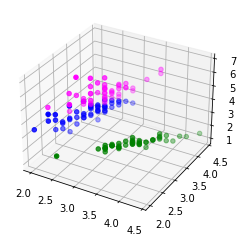

In [16]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

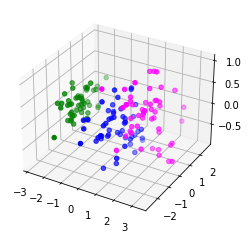

In [18]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [19]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [20]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [30]:
Xpca[y==0,0], Xpca[y==0,1], Xpca[y==0,2]

(array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
        -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
        -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
        -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
        -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
        -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
        -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
        -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
        -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
        -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344]),
 array([ 0.4800266 , -0.67413356, -0.34190802, -0.59739451,  0.64683538,
         1.48917752,  0.0476442 ,  0.22314807, -1.11532768, -0.46901356,
         1.04369065,  0.13307834, -0.72867617, -0.96150673,  1.86005711,
         2.68628449,  1.48360936,  0.48883832,  1

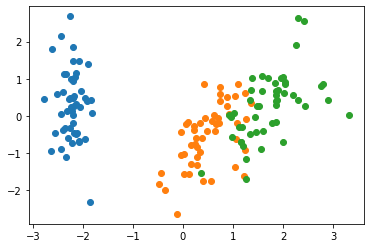

In [32]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0], Xpca[y==0,1])
plt.scatter(Xpca[y==1,0], Xpca[y==1,1])
plt.scatter(Xpca[y==2,0], Xpca[y==2,1])

# KNN classifier

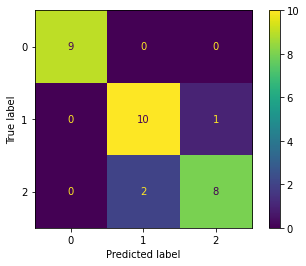

In [39]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)



In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

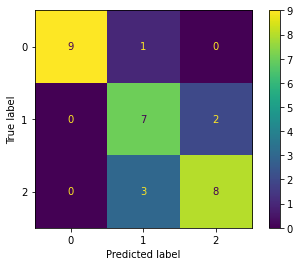

In [44]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset

X_train, X_test, y_train, y_test = train_test_split(Xpca[:,:2],y,test_size=0.2)
knn1=KNeighborsClassifier(n_neighbors=3)

knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

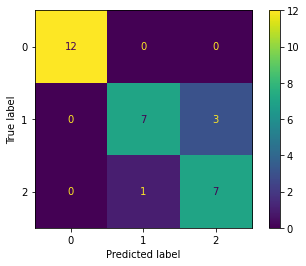

In [46]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset

X_train, X_test, y_train, y_test = train_test_split(X[:,:2],y,test_size=0.2)
knn1=KNeighborsClassifier(n_neighbors=3)

knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)